In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv("Star_data_with_custom_nulls.csv", encoding='latin1')

In [66]:
df.head()

,CONTRACT_ID,Member_ID,age,Breast Cancer Screening,Colorectal Cancer Screening,Annual Flu Vaccine,Monitoring Physical Activity,Special Needs Plan (SNP) Care Management,Care for Older Adults Â Medication Review,Care for Older Adults Â Pain Assessment,...,Getting Needed Prescription Drugs,MPF Price Accuracy,Medication Adherence for Diabetes Medications,Medication Adherence for Hypertension (RAS antagonists),Medication Adherence for Cholesterol (Statins),MTM Program Completion Rate for CMR,Historical_Star_Rating,Region,Gender_encoded,Organization_encoded
0,H5084,MEM_10000,31,0.465,NaN,0.792,0.396,0.5627,0.4807,0.5493,...,0.1252,0.8833,0.7639,0.5588,NaN,0.6264,3.5,Northeast,0,299
1,E3014,MEM_10001,32,0.48,0.1467,0.6446,0.4835,No data available,0.0443,0.0063,...,0.15,0.954,0.8509,0.6714,0.6585,0.5433,3.6,Northeast,1,237
2,H0022,MEM_10002,33,0.495,0.495,0.1999,,0.6999,0.3092,0.0884,...,0.2034,0.0965,0.0887,0.9348,0.0034,0.0029,4.1,Northeast,0,82
3,H0028,MEM_10003,34,NaN,0.8433,0.6726,0.8407,NaN,0.4997,0.2142,...,0.4397,0.4821,0.456,0.3278,0.6573,0.5751,3.0,Northeast,1,165
4,H0029,MEM_10004,35,0.525,NaN,NaN,0.1916,0.0249,0.5783,0.3304,...,0.9919,0.5254,0.5112,0.4086,0.7591,0.6832,3.5,Northeast,0,14


In [67]:
df.shape

(769, 47)

In [ ]:
df.isnull().sum()

CONTRACT_ID                                                                                         19
Member_ID                                                                                           15
age                                                                                                 18
Breast Cancer Screening                                                                             18
Colorectal Cancer Screening                                                                         14
Annual Flu Vaccine                                                                                  17
Monitoring Physical Activity                                                                        12
Special Needs Plan (SNP) Care Management                                                            19
Care for Older Adults Â Medication Review                                                          13
Care for Older Adults Â Pain Assessment                                 

In [69]:
df.describe(include='all')


,CONTRACT_ID,Member_ID,age,Breast Cancer Screening,Colorectal Cancer Screening,Annual Flu Vaccine,Monitoring Physical Activity,Special Needs Plan (SNP) Care Management,Care for Older Adults Â Medication Review,Care for Older Adults Â Pain Assessment,...,Getting Needed Prescription Drugs,MPF Price Accuracy,Medication Adherence for Diabetes Medications,Medication Adherence for Hypertension (RAS antagonists),Medication Adherence for Cholesterol (Statins),MTM Program Completion Rate for CMR,Historical_Star_Rating,Region,Gender_encoded,Organization_encoded
count,750,754,751,751,755,752,757,750,756,755,...,756,750,751,752,756,756,769.000000,747,756,750
unique,738,740,56,56,56,56,55,56,56,56,...,56,56,56,56,56,56,NaN,9,7,312
top,Plan not required to report measure,Not required to report,34,0.465,0.1467,0.1999,0.1157,0.3414,0.3092,0.5493,...,0.1252,0.8833,0.0887,0.5588,0.6573,0.5433,NaN,Northeast,1,300
freq,6,6,16,16,16,16,29,15,16,16,...,15,16,16,16,16,16,NaN,214,366,58
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.455527,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.382867,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.800000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.300000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 47 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   CONTRACT_ID                                                                                       750 non-null    object 
 1   Member_ID                                                                                         754 non-null    object 
 2   age                                                                                               751 non-null    object 
 3   Breast Cancer Screening                                                                           751 non-null    object 
 4   Colorectal Cancer Screening                                                                       755 non-null    object 
 5   A

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("Star_data_with_custom_nulls.csv", encoding='latin1')

missing_values = [
    "", " ", "Not enough data available", 
    "Plan not required to report measure", 
    "Not required to report",
    "NA", "N/A", "nan", "No data available"
]
df.replace(missing_values, np.nan, inplace=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

threshold_col = len(df) * 0.7
df.dropna(axis=1, thresh=threshold_col, inplace=True)

threshold_row = len(df.columns) * 0.7
df.dropna(axis=0, thresh=threshold_row, inplace=True)

df.reset_index(drop=True, inplace=True)

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (769, 47)


In [72]:
df.head()

,CONTRACT_ID,Member_ID,age,Breast Cancer Screening,Colorectal Cancer Screening,Annual Flu Vaccine,Monitoring Physical Activity,Special Needs Plan (SNP) Care Management,Care for Older Adults Â Medication Review,Care for Older Adults Â Pain Assessment,...,Getting Needed Prescription Drugs,MPF Price Accuracy,Medication Adherence for Diabetes Medications,Medication Adherence for Hypertension (RAS antagonists),Medication Adherence for Cholesterol (Statins),MTM Program Completion Rate for CMR,Historical_Star_Rating,Region,Gender_encoded,Organization_encoded
0,H5084,MEM_10000,31.0,0.465,NaN,0.7920,0.3960,0.5627,0.4807,0.5493,...,0.1252,0.8833,0.7639,0.5588,NaN,0.6264,3.5,Northeast,0.0,299.0
1,E3014,MEM_10001,32.0,0.480,0.1467,0.6446,0.4835,NaN,0.0443,0.0063,...,0.1500,0.9540,0.8509,0.6714,0.6585,0.5433,3.6,Northeast,1.0,237.0
2,H0022,MEM_10002,33.0,0.495,0.4950,0.1999,NaN,0.6999,0.3092,0.0884,...,0.2034,0.0965,0.0887,0.9348,0.0034,0.0029,4.1,Northeast,0.0,82.0
3,H0028,MEM_10003,34.0,NaN,0.8433,0.6726,0.8407,NaN,0.4997,0.2142,...,0.4397,0.4821,0.4560,0.3278,0.6573,0.5751,3.0,Northeast,1.0,165.0
4,H0029,MEM_10004,35.0,0.525,NaN,NaN,0.1916,0.0249,0.5783,0.3304,...,0.9919,0.5254,0.5112,0.4086,0.7591,0.6832,3.5,Northeast,0.0,14.0


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Star_data_with_custom_nulls.csv", encoding='latin1')

missing_values = [
    "", " ", "Not enough data available", 
    "Plan not required to report measure", 
    "Not required to report",
    "NA", "N/A", "nan", "No data available"
]
df.replace(missing_values, np.nan, inplace=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

for col in df.columns:
    if df[col].dtype == 'object':  
        mode_value = df[col].mode(dropna=True)
        if not mode_value.empty:
            df[col].fillna(mode_value[0], inplace=True)
    else:  
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

df.reset_index(drop=True, inplace=True)

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (769, 47)


In [74]:
df.head()

,CONTRACT_ID,Member_ID,age,Breast Cancer Screening,Colorectal Cancer Screening,Annual Flu Vaccine,Monitoring Physical Activity,Special Needs Plan (SNP) Care Management,Care for Older Adults Â Medication Review,Care for Older Adults Â Pain Assessment,...,Getting Needed Prescription Drugs,MPF Price Accuracy,Medication Adherence for Diabetes Medications,Medication Adherence for Hypertension (RAS antagonists),Medication Adherence for Cholesterol (Statins),MTM Program Completion Rate for CMR,Historical_Star_Rating,Region,Gender_encoded,Organization_encoded
0,H5084,MEM_10000,31.0,0.465,0.5067,0.7920,0.3960,0.5627,0.4807,0.5493,...,0.1252,0.8833,0.7639,0.5588,0.6019,0.6264,3.5,Northeast,0.0,299.0
1,E3014,MEM_10001,32.0,0.480,0.1467,0.6446,0.4835,0.4629,0.0443,0.0063,...,0.1500,0.9540,0.8509,0.6714,0.6585,0.5433,3.6,Northeast,1.0,237.0
2,H0022,MEM_10002,33.0,0.495,0.4950,0.1999,0.2057,0.6999,0.3092,0.0884,...,0.2034,0.0965,0.0887,0.9348,0.0034,0.0029,4.1,Northeast,0.0,82.0
3,H0028,MEM_10003,34.0,0.615,0.8433,0.6726,0.8407,0.4629,0.4997,0.2142,...,0.4397,0.4821,0.4560,0.3278,0.6573,0.5751,3.0,Northeast,1.0,165.0
4,H0029,MEM_10004,35.0,0.525,0.5067,0.4079,0.1916,0.0249,0.5783,0.3304,...,0.9919,0.5254,0.5112,0.4086,0.7591,0.6832,3.5,Northeast,0.0,14.0


In [75]:
df.isnull().sum()

CONTRACT_ID                                                                                         0
Member_ID                                                                                           0
age                                                                                                 0
Breast Cancer Screening                                                                             0
Colorectal Cancer Screening                                                                         0
Annual Flu Vaccine                                                                                  0
Monitoring Physical Activity                                                                        0
Special Needs Plan (SNP) Care Management                                                            0
Care for Older Adults Â Medication Review                                                          0
Care for Older Adults Â Pain Assessment                                          

In [ ]:

print(df['Region'].head())


0    Northeast
1    Northeast
2    Northeast
3    Northeast
4    Northeast
Name: Region, dtype: object


In [ ]:

gender_mapping = {'Male': 0, 'Female': 1}
df['Gender_encoded'] = df['Gender'].map(gender_mapping)
df = df.drop(columns=['Gender'])
print("Gender encoding completed:")
print(df['Gender_encoded'].value_counts())

In [78]:
print(df['Organization_encoded'].unique())
print("Number of unique labels:", df['Organization_encoded'].nunique())


[299. 237.  82. 165.  14. 151. 315. 313.  56. 105. 305. 300.  19.  51.
 177.  93. 101. 183. 203. 202.  76.   7. 175.  31. 317.  18.  81. 320.
  55. 259. 278.  42.  94. 135. 153. 307. 223.  86. 179. 174.  62.   9.
 324. 301. 117.  72. 256. 235.   8. 152. 141. 285.  34. 173. 195.  65.
 157. 314. 279. 143. 234. 192. 158. 238. 303.  40. 266. 255.  47. 107.
 271. 318. 268.  52.  46. 325. 291. 245. 147. 146. 176. 274. 243. 172.
 280. 155.  75. 193. 294. 293.  63. 209.   3. 211. 270. 124.  83. 207.
 244. 154.  37. 114. 267. 298. 272. 206. 261. 102.  66.  10. 241.  13.
  67.  77. 113. 251. 186. 123. 126. 169. 121. 161.  85.  68. 120. 239.
  11.  35. 246.  36.  49. 231. 281. 242. 284.  25. 106. 112. 127. 250.
  12. 263.   2. 253.  57. 262. 149. 230. 296. 168.  88. 138.  70. 197.
 229. 289. 264. 277. 118.  33. 220. 304.  29. 297. 180. 249.  24. 196.
 254. 323. 292. 290.  32. 110. 132.  69.  45.  41. 283. 160. 104. 308.
 217. 265. 260. 194. 252. 116. 210.  17. 273. 137. 156.  87. 134. 108.
 276. 

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns detected:", numeric_cols)


Numeric columns detected: Index(['age', 'Breast Cancer Screening', 'Colorectal Cancer Screening',
       'Annual Flu Vaccine', 'Monitoring Physical Activity',
       'Special Needs Plan (SNP) Care Management',
       'Care for Older Adults Â Medication Review',
       'Care for Older Adults Â Pain Assessment',
       'Osteoporosis Management in Women who had a Fracture',
       'Diabetes Care Â Eye Exam', 'Diabetes Care Â Blood Sugar Controlled',
       'Controlling Blood Pressure', 'Reducing the Risk of Falling',
       'Improving Bladder Control', 'Medication Reconciliation Post-Discharge',
       'Plan All-Cause Readmissions',
       'Statin Therapy for Patients with Cardiovascular Disease',
       'Transitions of Care',
       'Follow-up after Emergency Department Visit for People with Multiple High-Risk Chronic Conditions',
       'Getting Needed Care', 'Getting Appointments and Care Quickly',
       'Customer Service', 'Rating of Health Care Quality',
       'Rating of Health

In [80]:
df.dtypes

CONTRACT_ID                                                                                          object
Member_ID                                                                                            object
age                                                                                                 float64
Breast Cancer Screening                                                                             float64
Colorectal Cancer Screening                                                                         float64
Annual Flu Vaccine                                                                                  float64
Monitoring Physical Activity                                                                        float64
Special Needs Plan (SNP) Care Management                                                            float64
Care for Older Adults Â Medication Review                                                          float64
Care for Older Adults Â Pai

In [ ]:
exclude_cols = ['Gender_encoded', 'Organization_encoded', 'Region', 'CONTRACT_ID', 'Member_ID']
for col in df.columns:
    if col not in exclude_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.dtypes)


CONTRACT_ID                                                                                          object
Member_ID                                                                                            object
age                                                                                                 float64
Breast Cancer Screening                                                                             float64
Colorectal Cancer Screening                                                                         float64
Annual Flu Vaccine                                                                                  float64
Monitoring Physical Activity                                                                        float64
Special Needs Plan (SNP) Care Management                                                            float64
Care for Older Adults Â Medication Review                                                          float64
Care for Older Adults Â Pai

In [82]:
df.dtypes

CONTRACT_ID                                                                                          object
Member_ID                                                                                            object
age                                                                                                 float64
Breast Cancer Screening                                                                             float64
Colorectal Cancer Screening                                                                         float64
Annual Flu Vaccine                                                                                  float64
Monitoring Physical Activity                                                                        float64
Special Needs Plan (SNP) Care Management                                                            float64
Care for Older Adults Â Medication Review                                                          float64
Care for Older Adults Â Pai

In [83]:
df['age'].unique()

array([31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 70.,
       71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 30., 69.])

In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
\
df.loc[df['age'] < 1, 'age'] = np.nan  
df['age'].fillna(df['age'].median(), inplace=True)

df['age'] = df['age'].astype(int)

print(df['age'].unique())


[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72 73 74 75 76 77 78 79
 80 30 69]


In [87]:
df.dtypes

CONTRACT_ID                                                                                          object
Member_ID                                                                                            object
age                                                                                                   int32
Breast Cancer Screening                                                                             float64
Colorectal Cancer Screening                                                                         float64
Annual Flu Vaccine                                                                                  float64
Monitoring Physical Activity                                                                        float64
Special Needs Plan (SNP) Care Management                                                            float64
Care for Older Adults Â Medication Review                                                          float64
Care for Older Adults Â Pai

In [ ]:
df["Gender_encoded"] = df["Gender_encoded"].fillna(-1).astype(int)
df["Organization_encoded"] = df["Organization_encoded"].fillna(-1).astype(int)
print(df[["Gender_encoded", "Organization_encoded"]].dtypes)


Gender_encoded          int32
Organization_encoded    int32
dtype: object


Feature Engineering


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['age', 'Organization_encoded', 'Region', 'CONTRACT_ID']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

non_constant_cols = [col for col in numeric_cols if df[col].std() != 0]

scaler = StandardScaler()
df[non_constant_cols] = scaler.fit_transform(df[non_constant_cols])


AFTER DOING THE DATA CLEANING AND FEATURE ENGINEERING STEPS WE ARE GOING TO PERFORM THE EDA STEPS TO UNDERSTAND THE IMPORTANCE OF EACH AND EVERY FEATURES ON PREDICTING THE "STAR RATING"

EDA


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, f_oneway
from sklearn.feature_selection import f_classif
target = 'Historical_Star_Rating'
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(target)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
pearson_corr = df[numeric_cols].corrwith(df[target], method='pearson').sort_values(ascending=False)
pearson_corr_top = pearson_corr.abs().sort_values(ascending=False)

In [ ]:
spearman_corr = df[numeric_cols].corrwith(df[target], method='spearman').sort_values(ascending=False)
spearman_corr_top = spearman_corr.abs().sort_values(ascending=False)

In [ ]:
anova_scores = {}
for col in categorical_cols:
    groups = [group[target].dropna() for name, group in df.groupby(col)]
    if len(groups) > 1:  
        try:
            f_stat, p_val = f_oneway(*groups)
            anova_scores[col] = abs(f_stat)
        except:
            continue

anova_scores = pd.Series(anova_scores).sort_values(ascending=False)

In [ ]:

combined_scores = pd.concat([
    pearson_corr_top.rename("Pearson"),
    spearman_corr_top.rename("Spearman"),
    anova_scores.rename("ANOVA")
], axis=1)

combined_scores = combined_scores.fillna(0)

combined_scores['Overall_Score'] = (
    combined_scores['Pearson'] +
    combined_scores['Spearman'] +
    combined_scores['ANOVA']
)

top_22_features = combined_scores.sort_values(by='Overall_Score', ascending=False).head(22)

print("Top 22 features contributing most to Historical_Star_Rating:\n")
print(top_22_features)

selected_features = top_22_features.index.tolist()

df_top22 = df[selected_features + ["Historical_Star_Rating"]]  

df_top22.to_csv("top_22_features_data.csv", index=False)

print("\n✅ Top 22 features data saved to 'top_22_features_data.csv'")

Top 22 features contributing most to Historical_Star_Rating:

                                                     Pearson  Spearman  \
Region                                              0.000000  0.000000   
Rating of Health Care Quality                       0.890856  0.597648   
Getting Needed Care                                 0.890264  0.597109   
Rating of Drug Plan                                 0.893218  0.593583   
Follow-up after Emergency Department Visit for ...  0.888053  0.596522   
Getting Needed Prescription Drugs                   0.896305  0.579788   
Rating of Health Plan                               0.883673  0.585976   
Getting Appointments and Care Quickly               0.885996  0.564074   
Customer Service                                    0.883858  0.540802   
age                                                 0.797695  0.595300   
Plan Makes Timely Decisions about Appeals           0.731824  0.528190   
MPF Price Accuracy                                

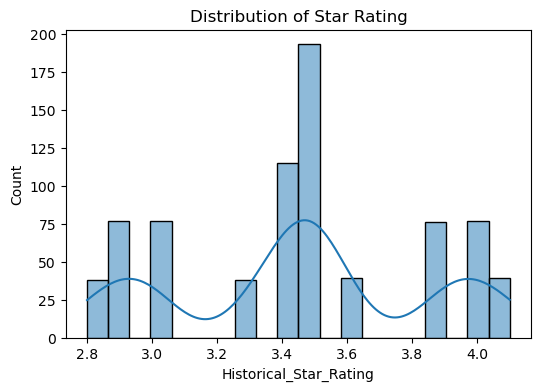

In [2]:
plt.figure(figsize=(6,4))
sns.histplot(df[target], bins=20, kde=True)
plt.title("Distribution of Star Rating")
plt.show()

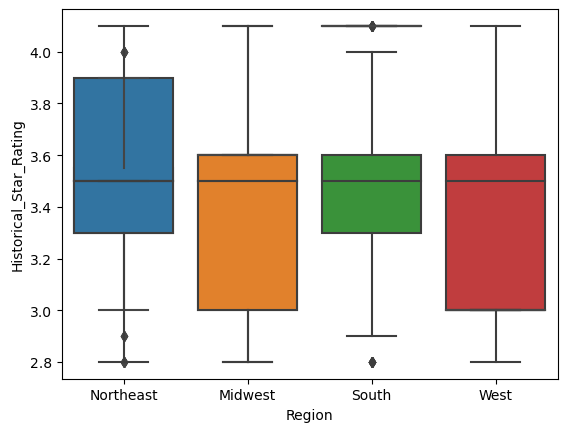

In [ ]:
for col in categorical_cols[:5]:  
    sns.boxplot(x=col, y=target, data=df)


C:\Users\91944\AppData\Local\Temp\ipykernel_21372\1465226184.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\91944\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 150 (\x96) missing from current font.

c:\Users\91944\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 150 (\x96) missing from current font.



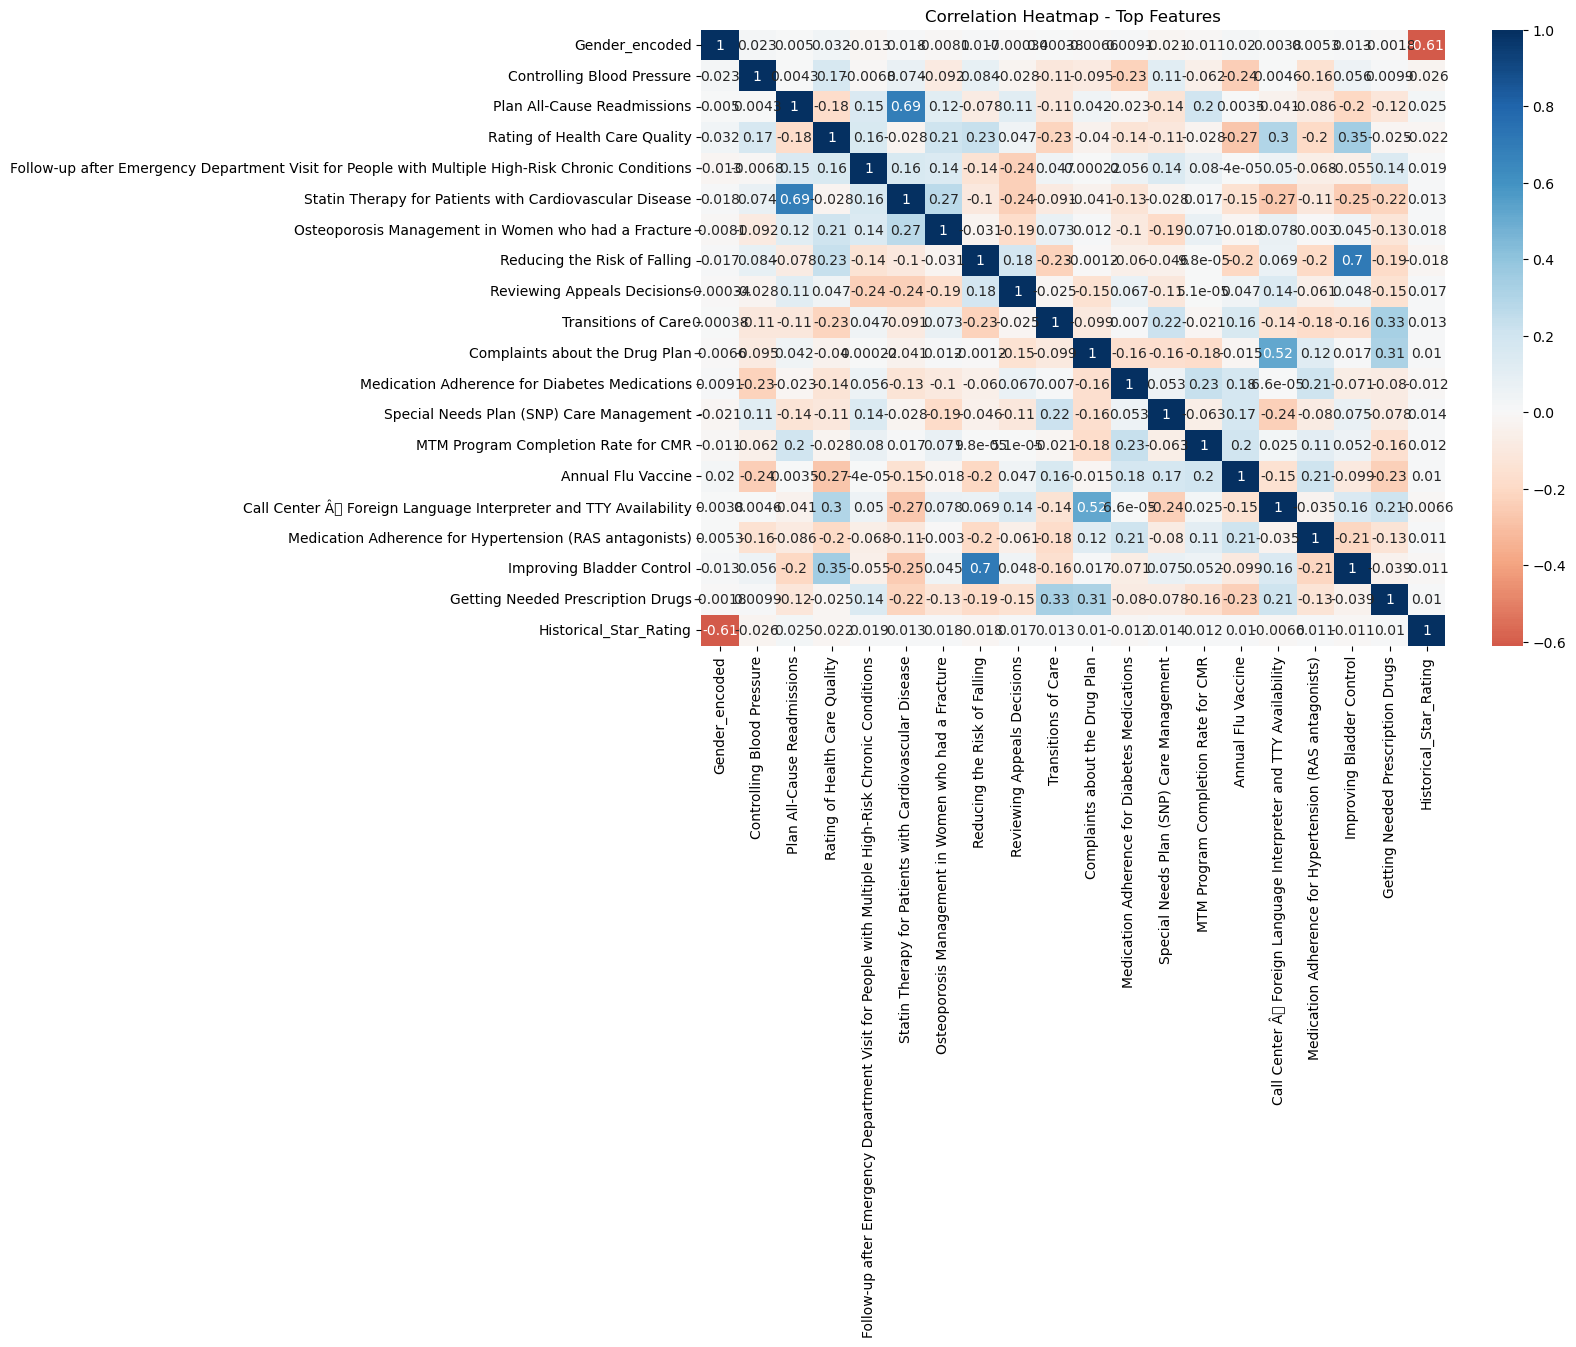

In [4]:
corr_matrix = df[top_22_features.index.tolist() + [target]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", center=0)
plt.title("Correlation Heatmap - Top Features")
plt.show()

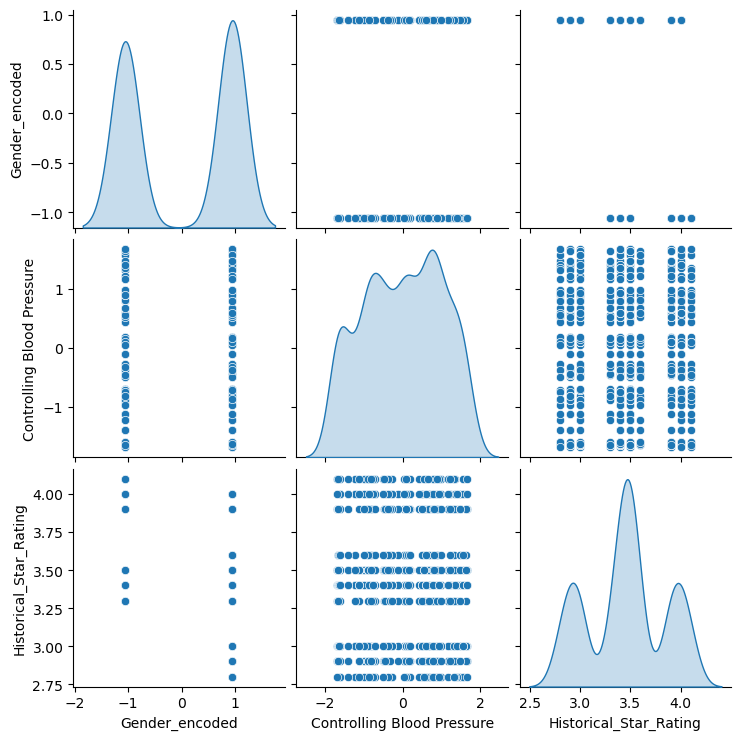

In [5]:
sns.pairplot(df[top_22_features.index[:5].tolist() + [target]], diag_kind="kde")
plt.show()